<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right;margin:15px;">
This notebook is an element of the [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/).

Author: Eric Marsden <eric.marsden@risk-engineering.org>.

---

In this notebook, we illustrate NumPy features for working with correlated data. Check the [associated lecture slides](https://risk-engineering.org/correlation/) for background material. 

# Linear correlation

In [1]:
import numpy
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

In [2]:
X = numpy.random.normal(10, 1, 100)
X

array([ 10.70817857,   9.21958742,  10.37368538,  10.99800217,
        10.65816952,  10.10674361,  11.75256288,   8.88605316,
        10.18522685,   9.95536343,   7.56044583,  10.00876594,
        11.09584917,  12.0583627 ,   9.36648269,  11.29513435,
        10.81182488,  11.3616754 ,   9.16650099,   9.54106629,
        10.44813264,   8.18001943,  10.40104115,   9.84142414,
         9.82227421,  10.80846922,   9.66751284,  10.81956639,
        10.09641424,   9.29177558,   8.85886569,  10.41889856,
        10.57244162,   8.84292191,  11.39026009,   9.54673208,
        10.52841851,  10.37217257,  10.30193457,  10.29252944,
         8.95733106,  10.5915869 ,  10.76605032,   8.95583805,
         9.43688338,   9.65116272,  10.02306039,   9.24310413,
         9.78477032,  10.66735129,   9.16279848,   9.67321392,
         8.06468998,   9.96141159,  10.60034022,   9.75298338,
        10.92909346,  10.28030658,   9.74799396,  10.19849345,
        10.37475903,   9.3834403 ,   9.76249822,  10.79

In [3]:
Y = -X + numpy.random.normal(0, 1, 100)

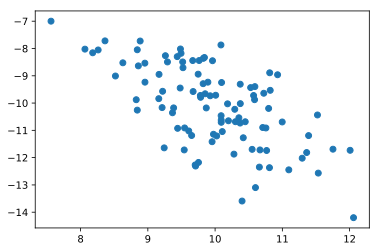

In [4]:
plt.scatter(X, Y);

Looking at the scatterplot above, we can see that the random variables $X$ and $Y$ are *correlated*. There are various statistical measures that allow us to quantify the degree of linear correlation. The most commonly used is [Pearson’s product-moment correlation coefficient](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient). It is available in `scipy.stats`. 

In [5]:
scipy.stats.pearsonr(X, Y)

(-0.62311538948516387, 4.4196300210180541e-12)

The first return value is the linear correlation coefficient; a value greater than 0.9 indicates a strong linear correlation. 

(The second return value is a *p-value*, which is a measure of the confidence which can be placed in the estimation of the correlation coefficient (smaller = more confidence). It tells you the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. Here we have a very very low p-value, so high confidence in the estimated value of the correlation coefficient.)

## Exercises

**Exercise**: show that when the error in $Y$ decreases, the correlation coefficient increases.

**Exercise**: produce data and a plot with a negative correlation coefficient.

## Anscombe’s quartet

Let’s examine four datasets produced by the statistician [Francis Anscombe](https://en.wikipedia.org/wiki/Frank_Anscombe) to illustrate the importance of exploring your data qualitatively (for example by plotting the data), rather than relying only on summary statistics such as the linear correlation coefficient.

In [6]:
x =  numpy.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = numpy.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = numpy.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = numpy.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = numpy.array([8,8,8,8,8,8,8,19,8,8,8])
y4 = numpy.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

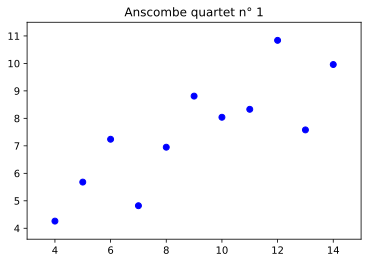

In [7]:
plt.plot(x, y1, 'ks', marker='o', color='blue')
plt.title(u"Anscombe quartet n° 1")
plt.margins(0.1)

In [8]:
scipy.stats.pearsonr(x, y1)

(0.81642051634484003, 0.0021696288730787888)

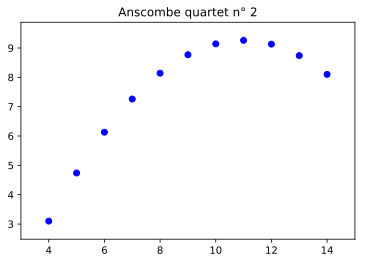

In [9]:
plt.plot(x, y2, 'ks', marker='o', color='blue')
plt.title(u"Anscombe quartet n° 2")
plt.margins(0.1)

In [10]:
scipy.stats.pearsonr(x, y2)

(0.81623650600024267, 0.0021788162369108031)

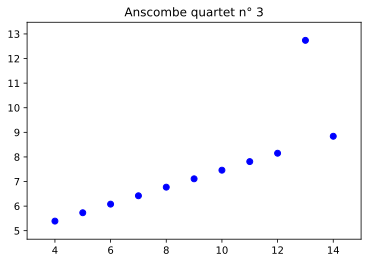

In [11]:
plt.plot(x, y3, 'ks', marker='o', color='blue')
plt.title(u"Anscombe quartet n° 3")
plt.margins(0.1)

In [12]:
scipy.stats.pearsonr(x, y3)

(0.81628673948959807, 0.0021763052792280304)

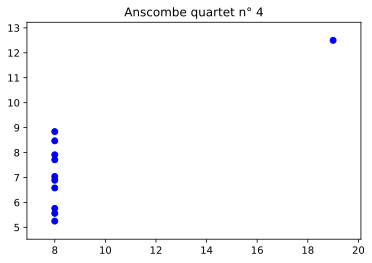

In [13]:
plt.plot(x4, y4, 'ks', marker='o', color='blue')
plt.title(u"Anscombe quartet n° 4")
plt.margins(0.1)

In [14]:
scipy.stats.pearsonr(x4, y4)

(0.81652143688850298, 0.0021646023471972127)

Notice that the linear correlation coefficient of the four datasets is identical, though clearly the relationship between $X$ and $Y$ is very different in each case!